#### In this notebook & Base_Model.ipynb I will create my first base model. This model will be a minial viable product end to end. The workflow for this notebook will be as follows 

* Cleaning
* EDA 
     * Univariate (base model) 
* Simple feature engineering
     * Dummy Variables 
* Model Selection
    *Logistic Regression 
    * Hyperparamter tunning (GS)
    
* Model Build and train 
* Serialize for deployment

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

### Initial brief data  exploration 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#No null values, but we can't really tell with some of the object data types becuse they can just have empty space columns or 0 and will be identified as null 

In [9]:
# Numerical Category description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Tenure spans from 0 - 72 months (0 - 6years)
* SeniorCitizen seems to be a binary feature (0 or 1), and it makes sense given it's description. It's also highly unbalanced, as at least 75% percent of it's values are set to 0.
* 75% of customers have been with the company for 55 months 
* Average monthly charges is 64 dollars, and 75% of customers pay 89 dollars per month 
* **note that Total monthly charges didn't show up in numerical as its an object type. Will look into it later**

In [10]:
# Categorical Category description

In [11]:
df.describe(include="O").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


* All object features have low cardinality. This indicates that those are categorical features. 
* Most are unbalanced 
* Totalchagres has empty values 11 times. (Will look into it more) 

## Data Cleaning 

In [12]:
df1 = df.copy()

In [13]:
# Total charges to numeric 
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# only 15% of data are nulls so ill drop it. 
df1.dropna(how = 'any', inplace = True)

In [15]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Replacing categorical columns with repeated 'No' 
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [17]:
# # Dropping unecessary columns
# df1.drop(columns= ['customerID'], axis=1, inplace=True)

In [18]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df1.to_csv('Cleaned1_Data.csv')

## Exploratory Data Analysis (Univariate)
* Categorical ()
* Numerical ()

#### Defining functions for my plots. 

I will use a A Pareto plot is a type of chart that contains both bars and a line graph, where individual values are represented in descending order by bars, and the cumulative total is represented by a line






In [20]:
# Pareto 
def pareto_plot(x, data, ax=None):
    counts_df = data.groupby(x).size().to_frame("count").sort_values("count", ascending=False)
    counts_df["cumperc"] = counts_df["count"].cumsum() / counts_df["count"].sum() * 100
    counts_df.index = counts_df.index.astype(str)

    if ax is None:
        _, ax = plt.subplots(figsize=(15, 6))

    ax.bar(counts_df.index, counts_df["count"], color="steelblue")
    for p, v in zip(ax.patches, counts_df["count"].values):
        v_str = str(v)
        p_width = p.get_width()
        p_x = p.get_x()
        ax.annotate(v_str, (p_x + p_width / 2, 50), ha="center", fontsize=12, color="white", weight="bold")
    ax.set_xlabel(x)
    ax.set_ylabel("Count")

    ax2 = ax.twinx()
    ax2.plot(counts_df.index, counts_df["cumperc"], color="darkorange", marker="D", ms=8, lw=2)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    for (x, y), v in zip(zip(counts_df.index, counts_df["cumperc"]), counts_df["cumperc"].values):
        ax2.annotate(f"{v:0.2f}%", (x, y + 5), ha="center", fontsize=12, color="maroon", weight="bold")
    ax2.set_ylim([0, 120])
    ax2.set_ylabel("Cumulative Frequency")

In [21]:
sns.set_context("paper")

In [22]:
def plot_stacked_percentages_plot(feature, data, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(15, 7))
        
    aux_df = data.groupby(feature)["Churn"].size().to_frame("total")
    aux_df["total_percent"] = 100
    aux_df["churned"] = data[data.Churn == "Yes"].groupby(feature).size()
    aux_df["not_churned"] = aux_df.total - aux_df.churned
    aux_df["churned_percent"] = np.round(aux_df.churned / aux_df.total * 100, 2)
    aux_df["not_churned_percent"] = np.round(aux_df.not_churned / aux_df.total * 100, 2)
    aux_df["churned_bar_height"] = aux_df.churned_percent / 2
    aux_df["not_churned_bar_height"] = aux_df.not_churned_percent / 2 + aux_df.churned_percent
    
    sns.barplot(x=aux_df.index, y="total_percent", data=aux_df, color="green", ax=ax)
    sns.barplot(x=aux_df.index, y="churned_percent", data=aux_df, color="red", ax=ax)
    
    aux = np.concatenate([aux_df[["churned_percent", "churned_bar_height"]].values, aux_df[["not_churned_percent", "not_churned_bar_height"]].values], axis=0)
    for p, (percent, height) in zip(ax.patches, aux):
        width = p.get_width()
        x = p.get_x()
        ax.annotate(f"{percent}%", (x + width / 2, height), ha="center", va="center", fontsize=12, color="white", weight="bold")
    
    top_bar = mpatches.Patch(color="green", label="No")
    bottom_bar = mpatches.Patch(color="red", label="Yes")
    ax.legend(handles=[top_bar, bottom_bar], loc="upper right", title="Churn")
    ax.set_ylabel("% Churn")


In [23]:
def plot_categorical_feature(feature, data, rotate_xticks=False):
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    pareto_plot(x=feature, data=data, ax=ax1)
    
    plot_stacked_percentages_plot(feature=feature, data=data, ax=ax2)
    
    if rotate_xticks:
        ax1.tick_params(axis="x", labelrotation=45)
        ax2.tick_params(axis="x", labelrotation=45)
    
    plt.suptitle(f"{feature} Feature Distribution")
    plt.tight_layout()

### Univariate Catergorical analysis [features with respect to Chrun target variable]

### Note that all analysis here are done on a univariate level, meaning only one variable is considered vs the target variable. This gives insights but not the full picture of customer segments and behaviroal trends. More EDA will be done to investigate futher 

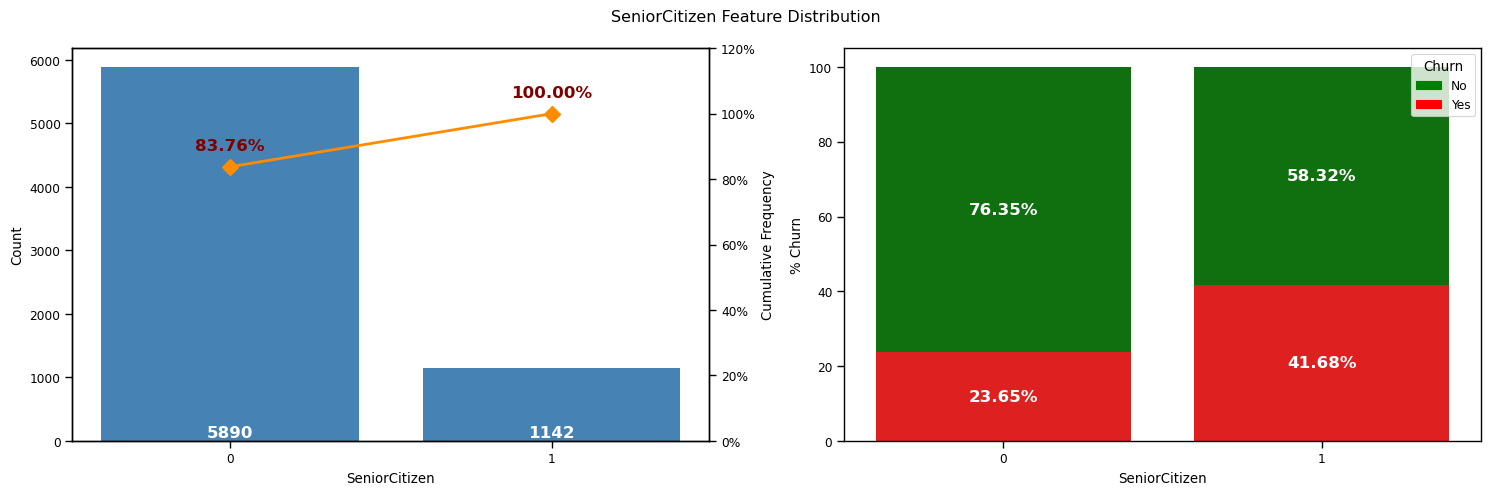

In [24]:
plot_categorical_feature(feature="SeniorCitizen", data=df1)

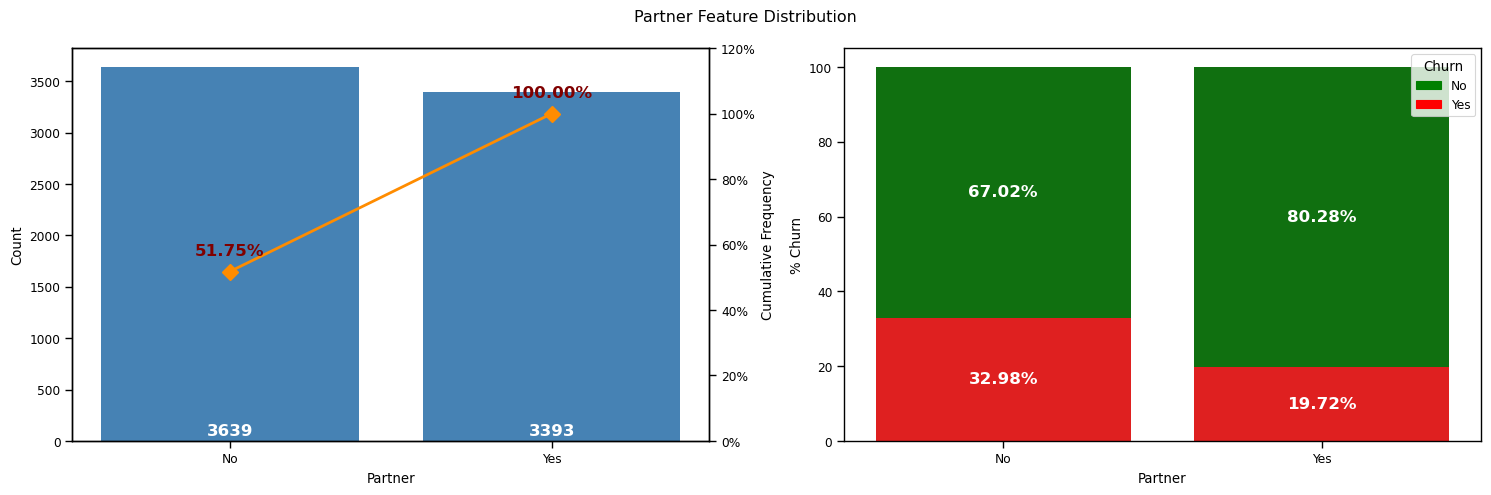

In [25]:
plot_categorical_feature(feature="Partner", data=df1)

* Relatively balanced in number 
* The churn frequency in the no partner (people without partners) is 1.6x higher than the yes partner (people that have partners)

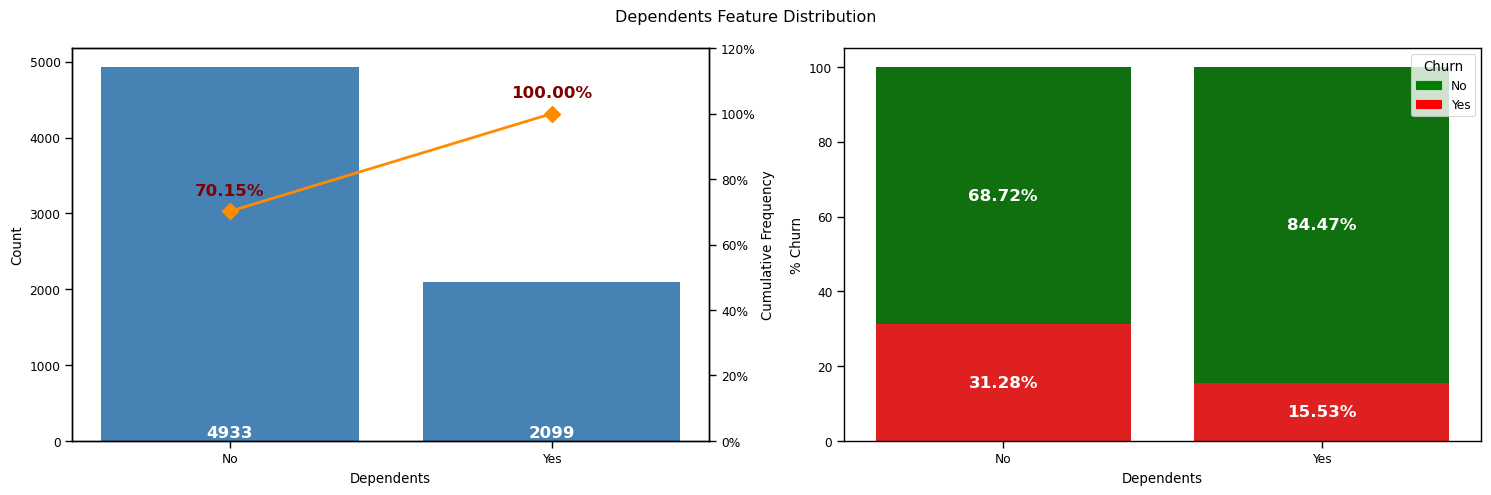

In [26]:
plot_categorical_feature(feature="Dependents", data=df1)

* 70% of the customers dont have dependents
* The proportion of churned customers that doesn't have dependents is almost the double of those that have

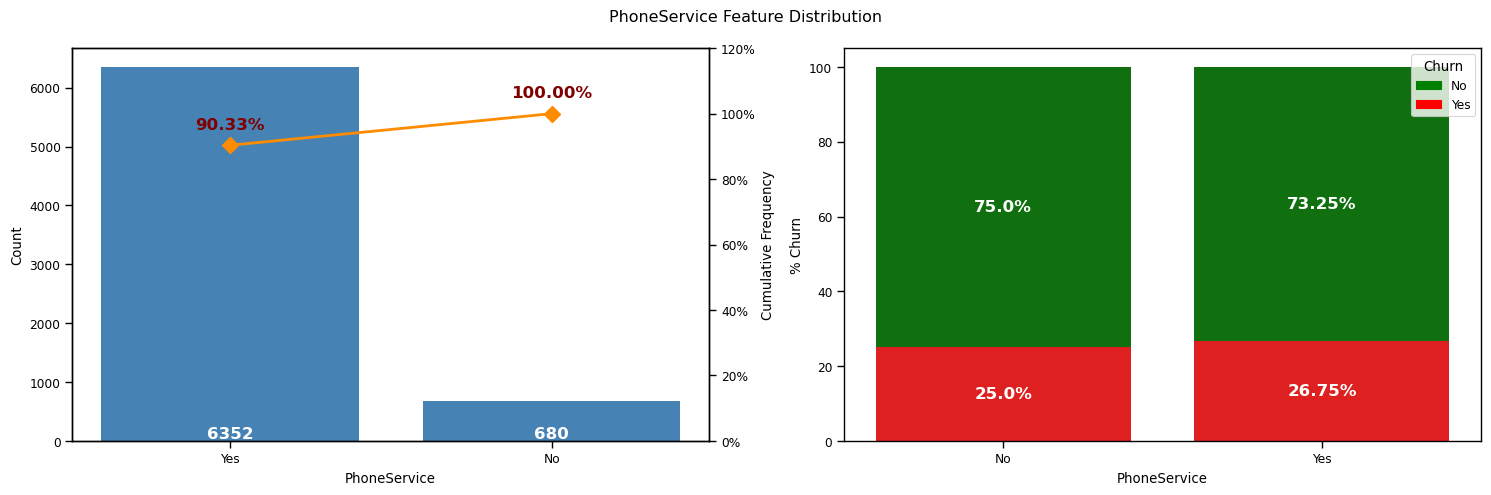

In [27]:
plot_categorical_feature(feature="PhoneService", data=df1)

* 90% of the customers have a phone line.
* The proportion of churned customers in both categories are almost te same.

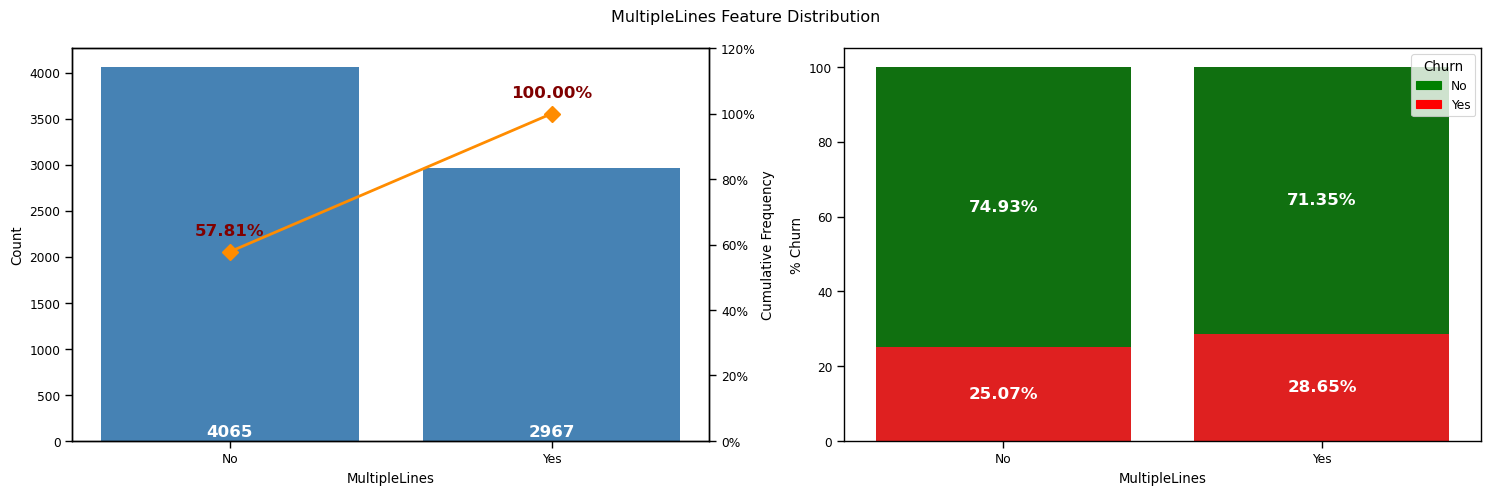

In [28]:
plot_categorical_feature(feature="MultipleLines", data=df1)

In [ ]:
* less than 10% of customers doesn't have a phone service.
* 48% of customers have only one phone line.
* 42% of customers have opted for more than one line.
* All categories have the same proportion of churned customer. So this features may not be usefull for classfication.

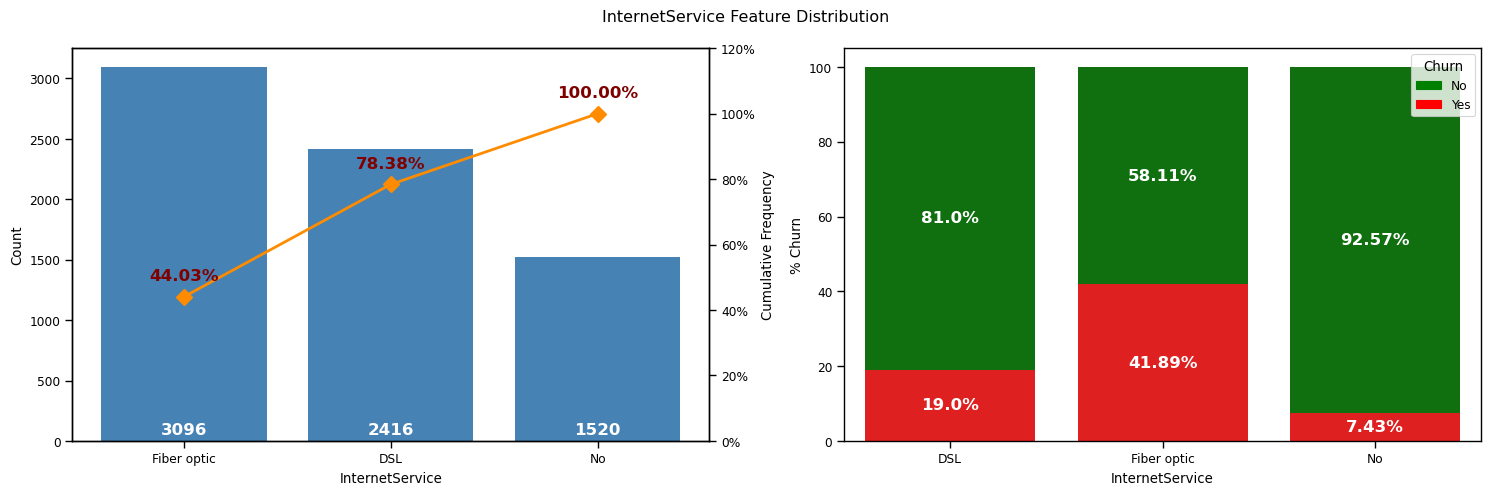

In [29]:
plot_categorical_feature(feature="InternetService", data=df1)

* 43% of customer have Fiver Optic internet service, the most popular internet service.
* 34% have older DSL internet service provider.
* about 22% of customer dont have an internet service at all.
* 42% of the fiber optics interenet service churn, which is the highest compared to 19% for DSL and lowest for customers without interenet service at all at 7%

** This features numbers are a bit odd and need futher investigation in my opinion. 

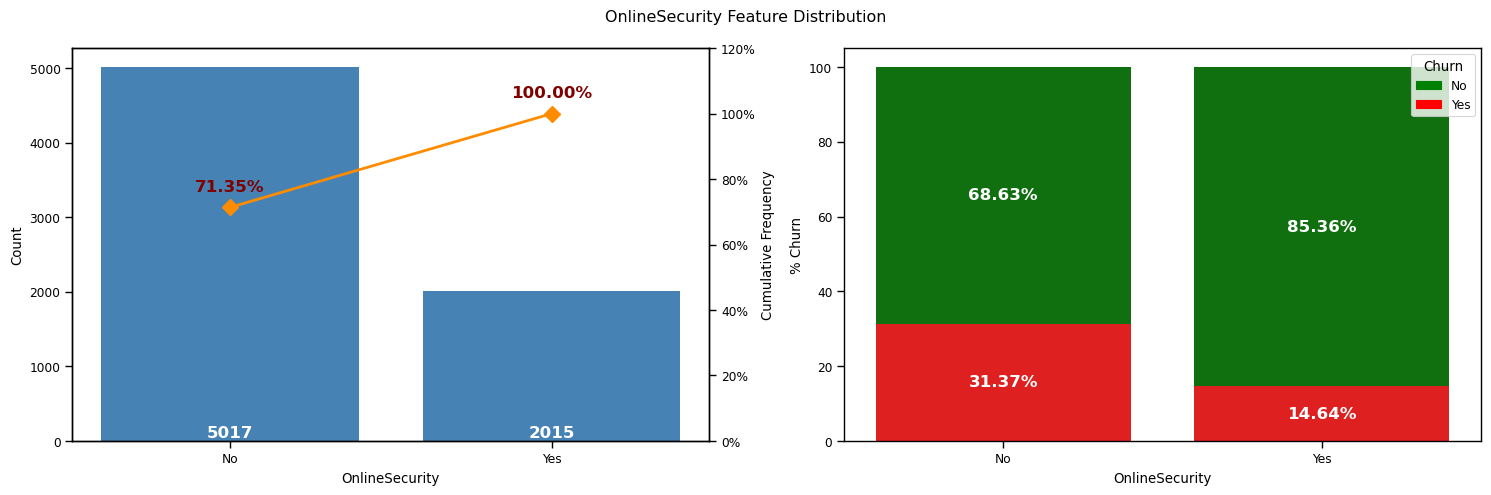

In [30]:
plot_categorical_feature(feature="OnlineSecurity", data=df1)

In [ ]:
* 70% of customers dont have online seccurity, that includes the 22% from the earlier feature who dont have interenet at all. 
* The churn frequency in the no online security customers is 1.6x higher than the customer with online services. 

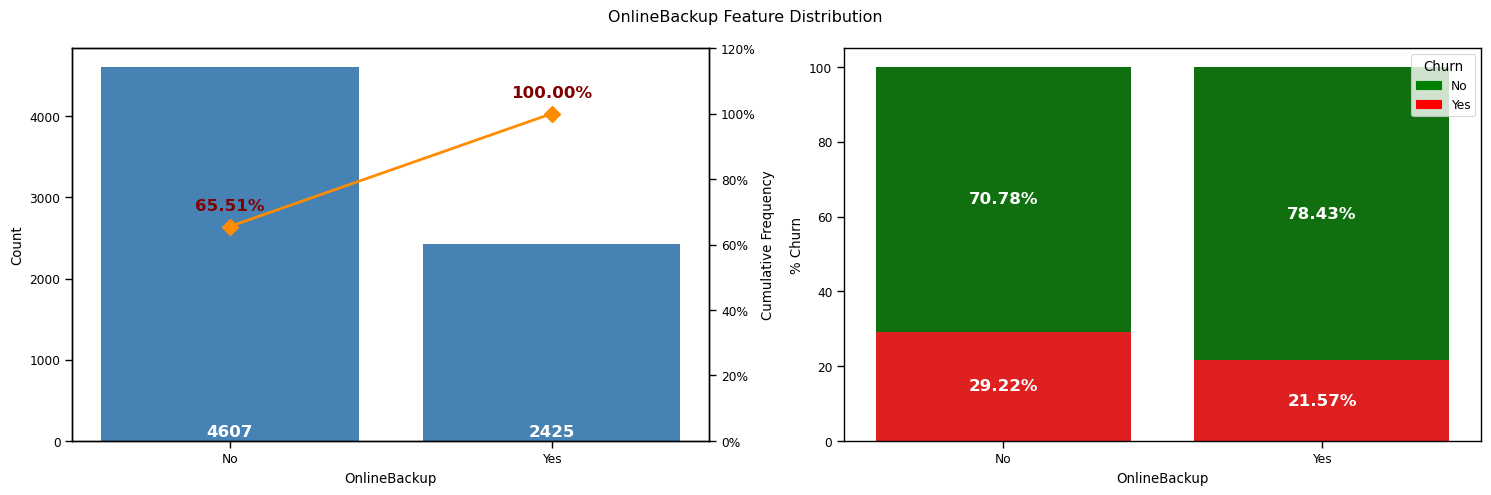

In [31]:
plot_categorical_feature(feature="OnlineBackup", data=df1)

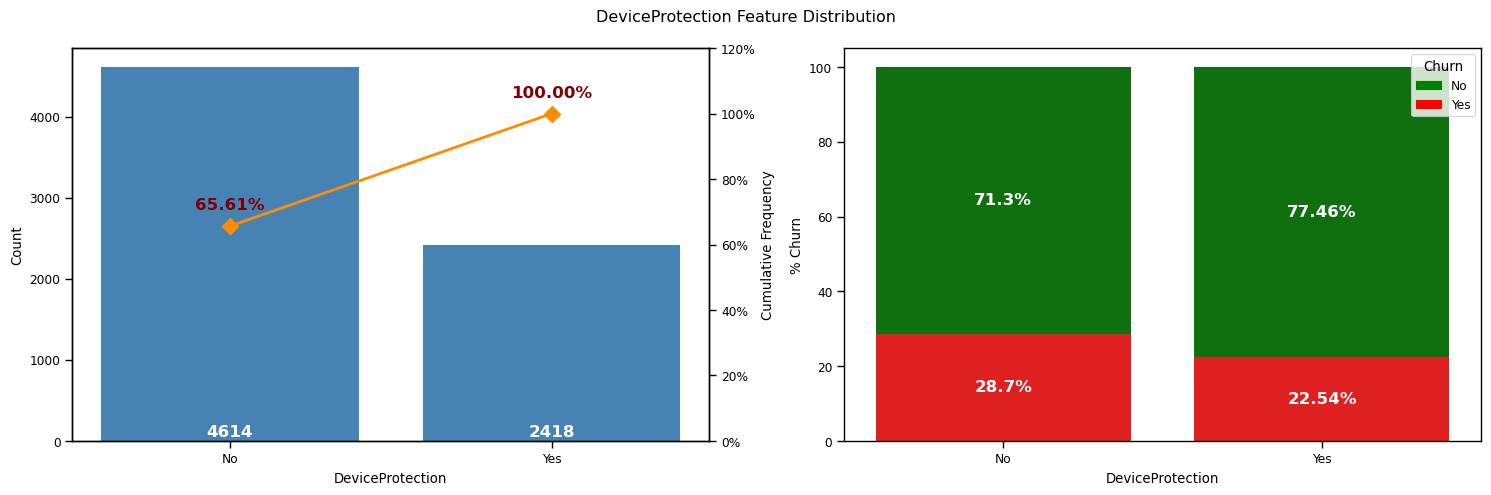

In [32]:
plot_categorical_feature(feature="DeviceProtection", data=df1)

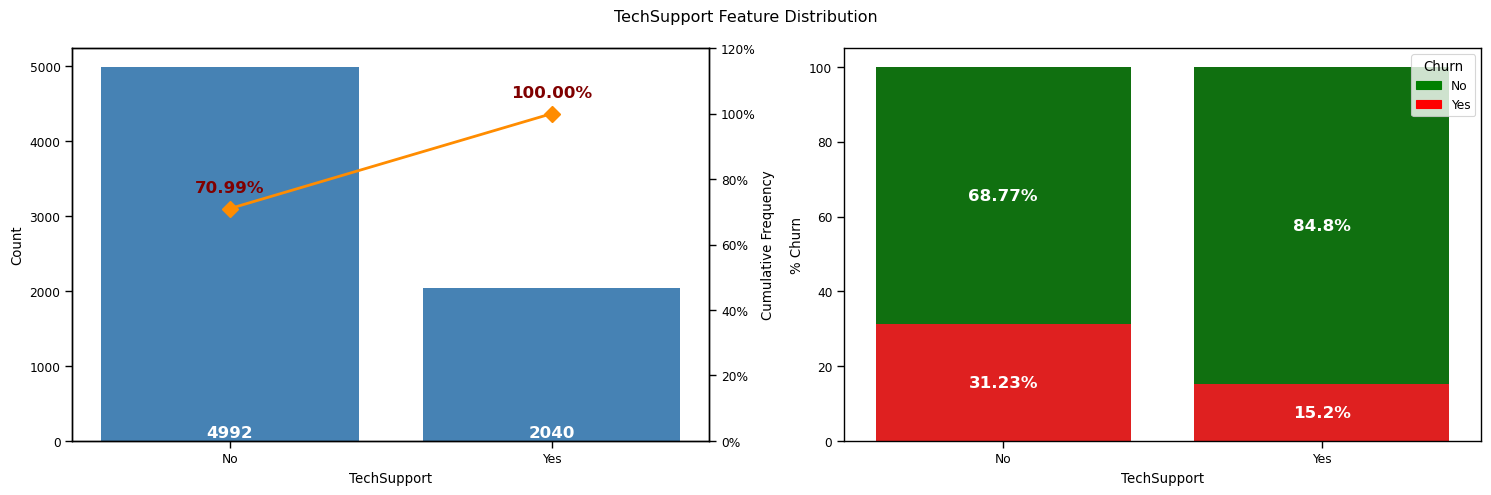

In [33]:
plot_categorical_feature(feature="TechSupport", data=df1)

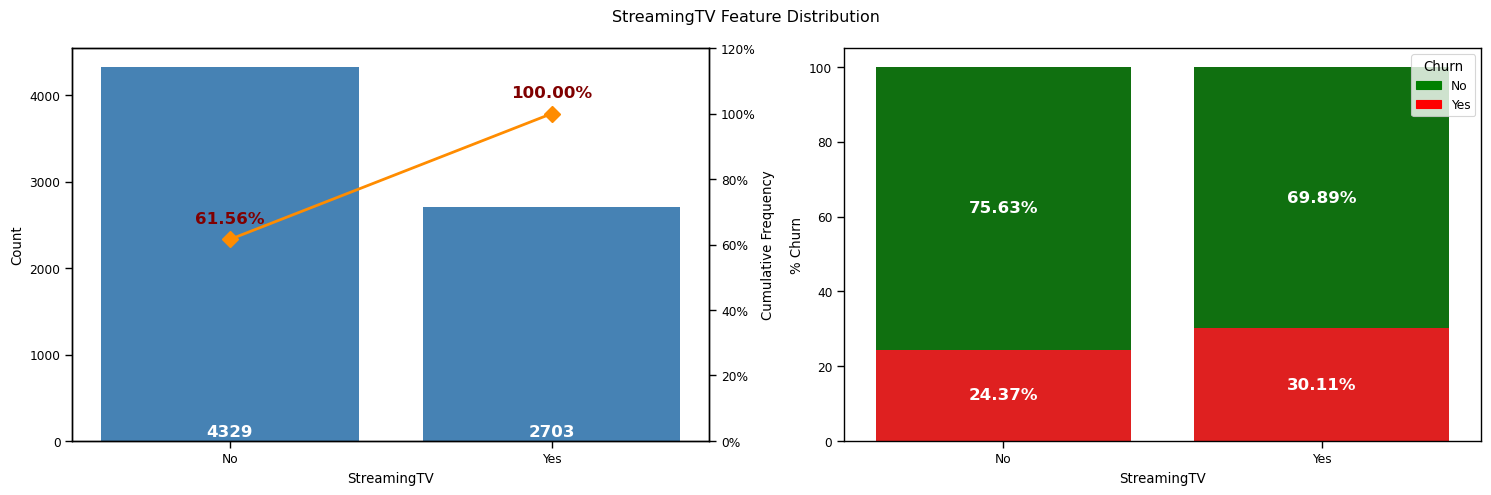

In [34]:
plot_categorical_feature(feature="StreamingTV", data=df1)b

* Generally, it can be seen that in services, customers without services are 1.5-2x more likely to churn than customer with services. 
* A solution is maybe add bundles on services, 2 get 1 etc. 

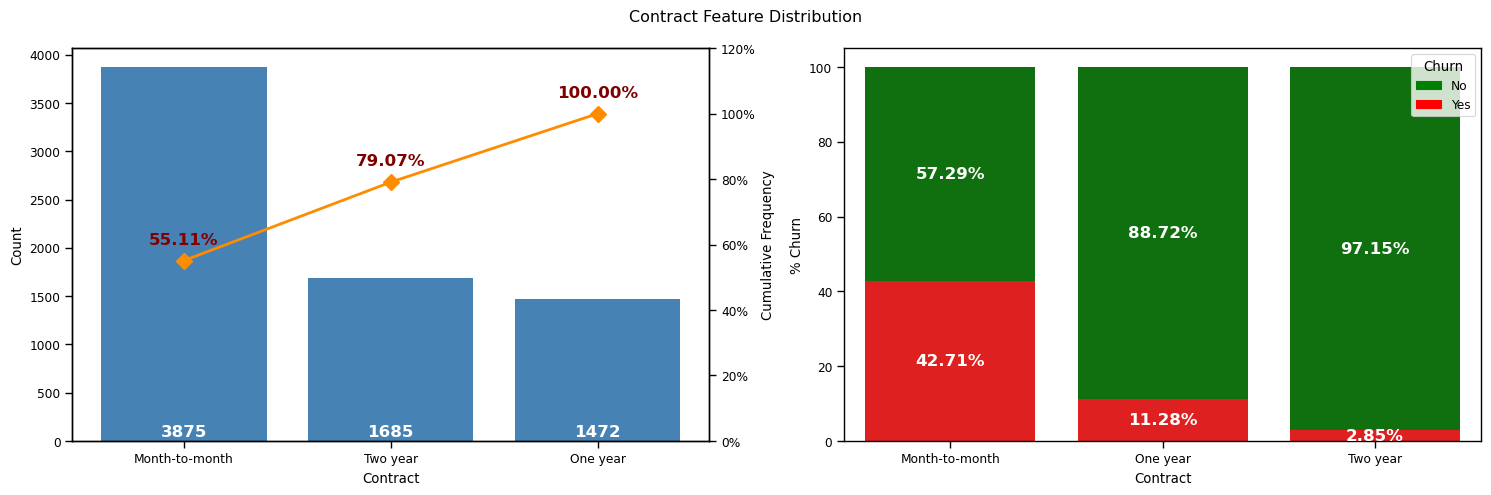

In [35]:
plot_categorical_feature(feature="Contract", data=df1)

* 55% of customers opted for monthly contracts. 
* One year and two year contract types have similar customer proportions, with 24,07% and 20,91% of customers respectively.
* The churn ratio in each category is different from each other, so this feature has some predicting power.
* Customers with monthly contract have the highest probability of leaving the company as the churn ratio of customers in this category is of 42,71%.
* Customers with longer contract periods have a lower propability of leaving the company. For customers with two year contract, only 2,83% have left.

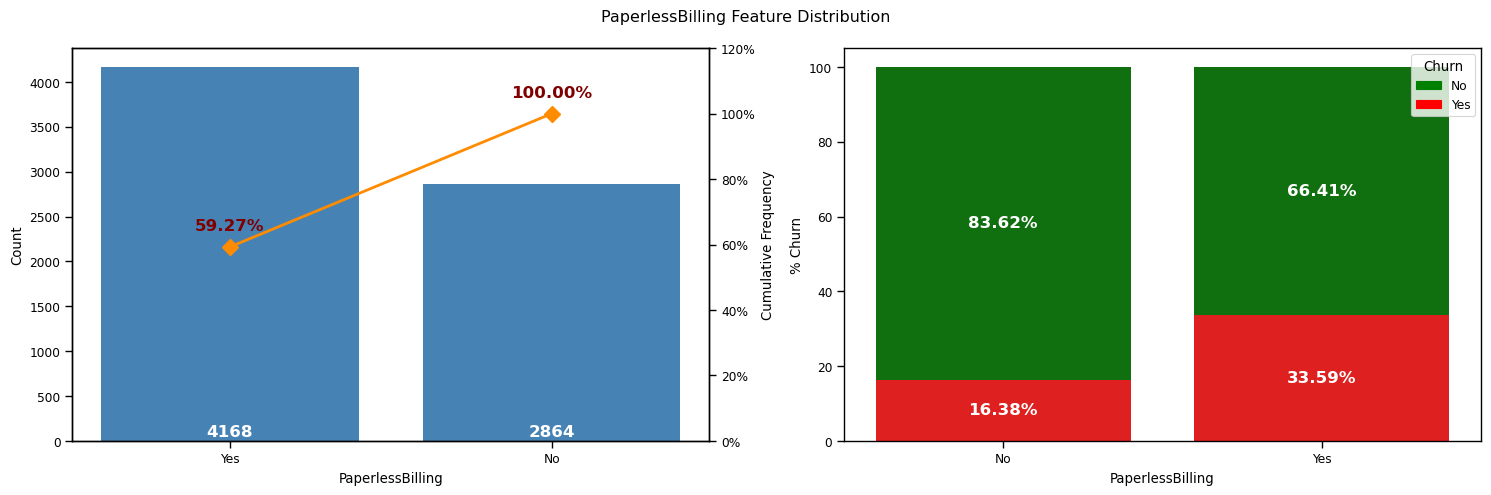

In [36]:
plot_categorical_feature(feature="PaperlessBilling", data=df1)

* Almost 60% of customers opted for the paperless billing.
* Customers with paperless billing have almost the double of the chance of churning thant those that don't, with 33.57% and 16.33% of customers that churned respectively.

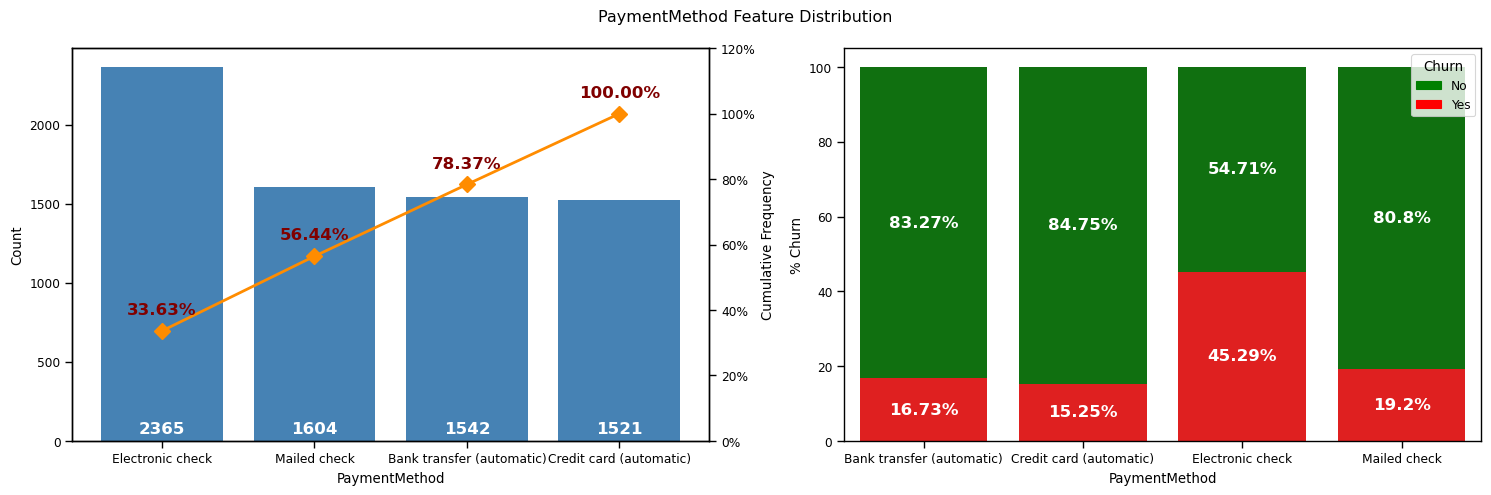

In [37]:
plot_categorical_feature(feature="PaymentMethod", data=df1)

* Electronic checkhas the higher customers number, with 33.58% of the total
* Electronic check also has the higher churn rate, with 45,29% of customers in this category.
* mailed check, Bank transferm (automatic) and Credit card (automatic) have hoghly the same customers share, with 22,89%, 21,92% and 21,61% respectively.
* Interestingly, mailed check, Bank transferm (automatic) and Credit card (automatic) also have similar churn ratios, with 19,11%, 16,71% and 15,24% respectively.

In [38]:
# plot_categorical_feature(feature="tenure", data=df1)

### Univariate Numerical analysis [features with respect to Chrun target variable]

In [39]:
#Tenure as a group for analysis

df_T_G = df.copy()

# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_T_G['tenure_group'] = pd.cut(df_T_G.tenure, range(1, 80, 12), right=False, labels=labels)


df_T_G['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [40]:
def plot_numerical_feature(feature, data):
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
    sns.histplot(x=feature, data=data, hue="Churn", ax=ax1, multiple="stack")
    sns.boxplot(x="Churn", y=feature, data=data, ax=ax2)
    plt.suptitle(f"{feature} Feature Distribution")

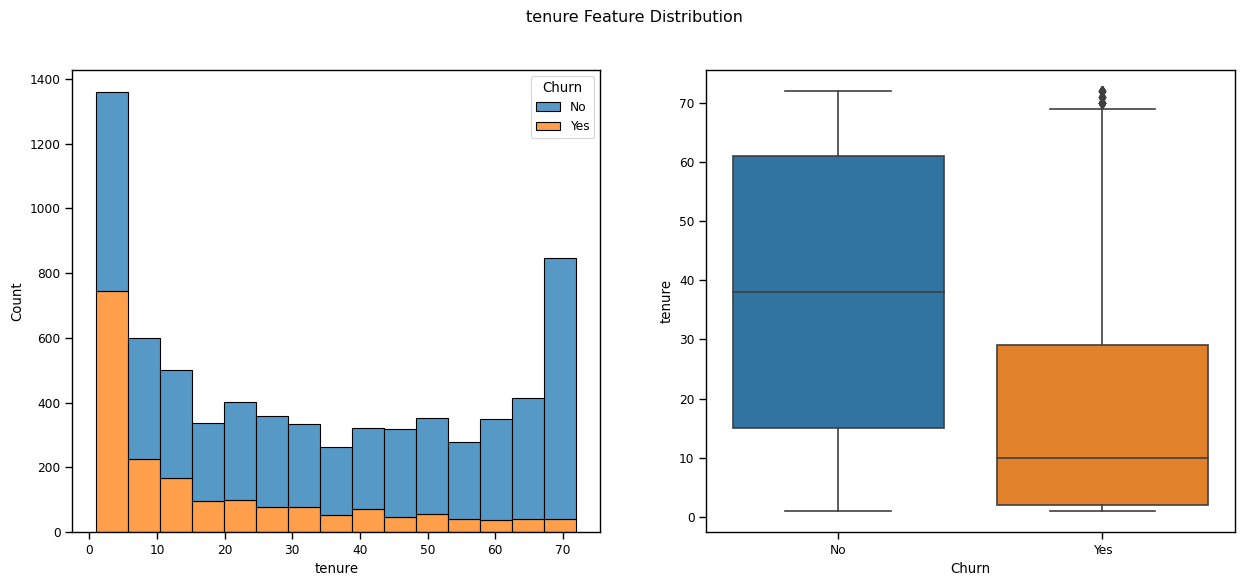

In [41]:
plot_numerical_feature("tenure", data=df1)

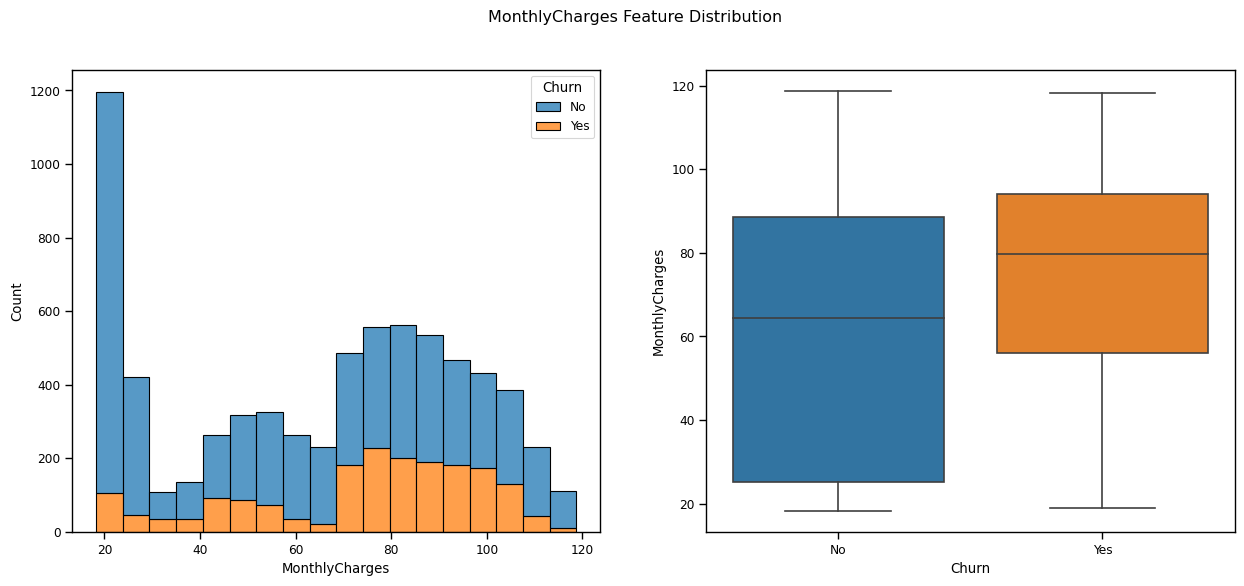

In [42]:
plot_numerical_feature("MonthlyCharges", data=df1)

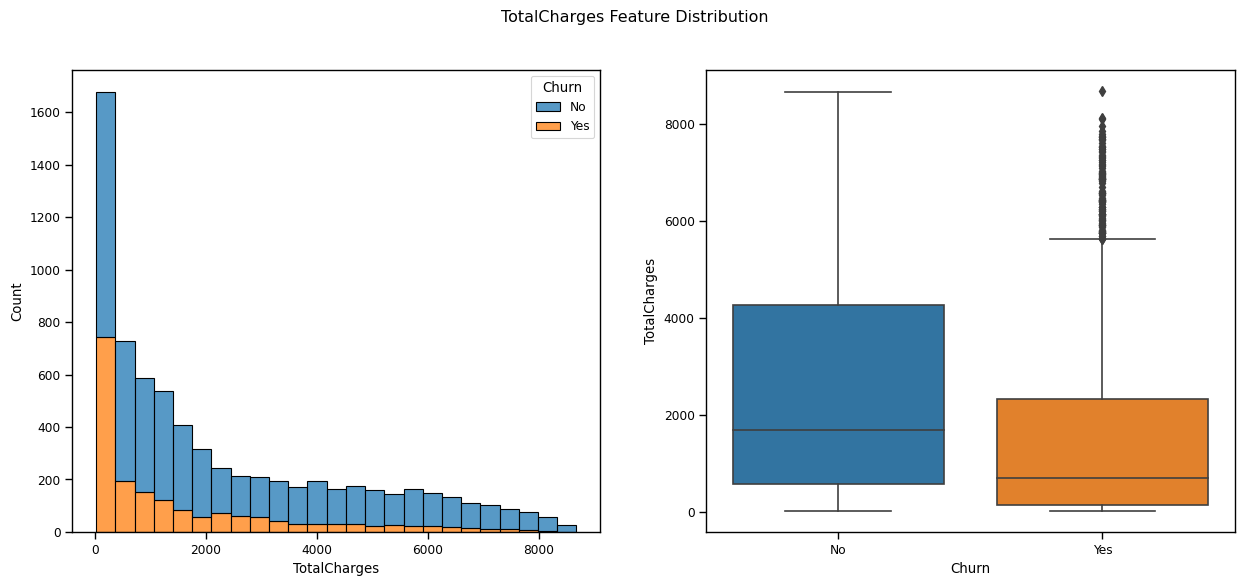

In [43]:
plot_numerical_feature("TotalCharges", data=df1)

In [44]:
# Corr of all Features with Churn 
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [45]:
## Categorical to numerical 
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

In [46]:
## Categorical to numerical 
df1_encod = pd.get_dummies(df1)

<AxesSubplot:>

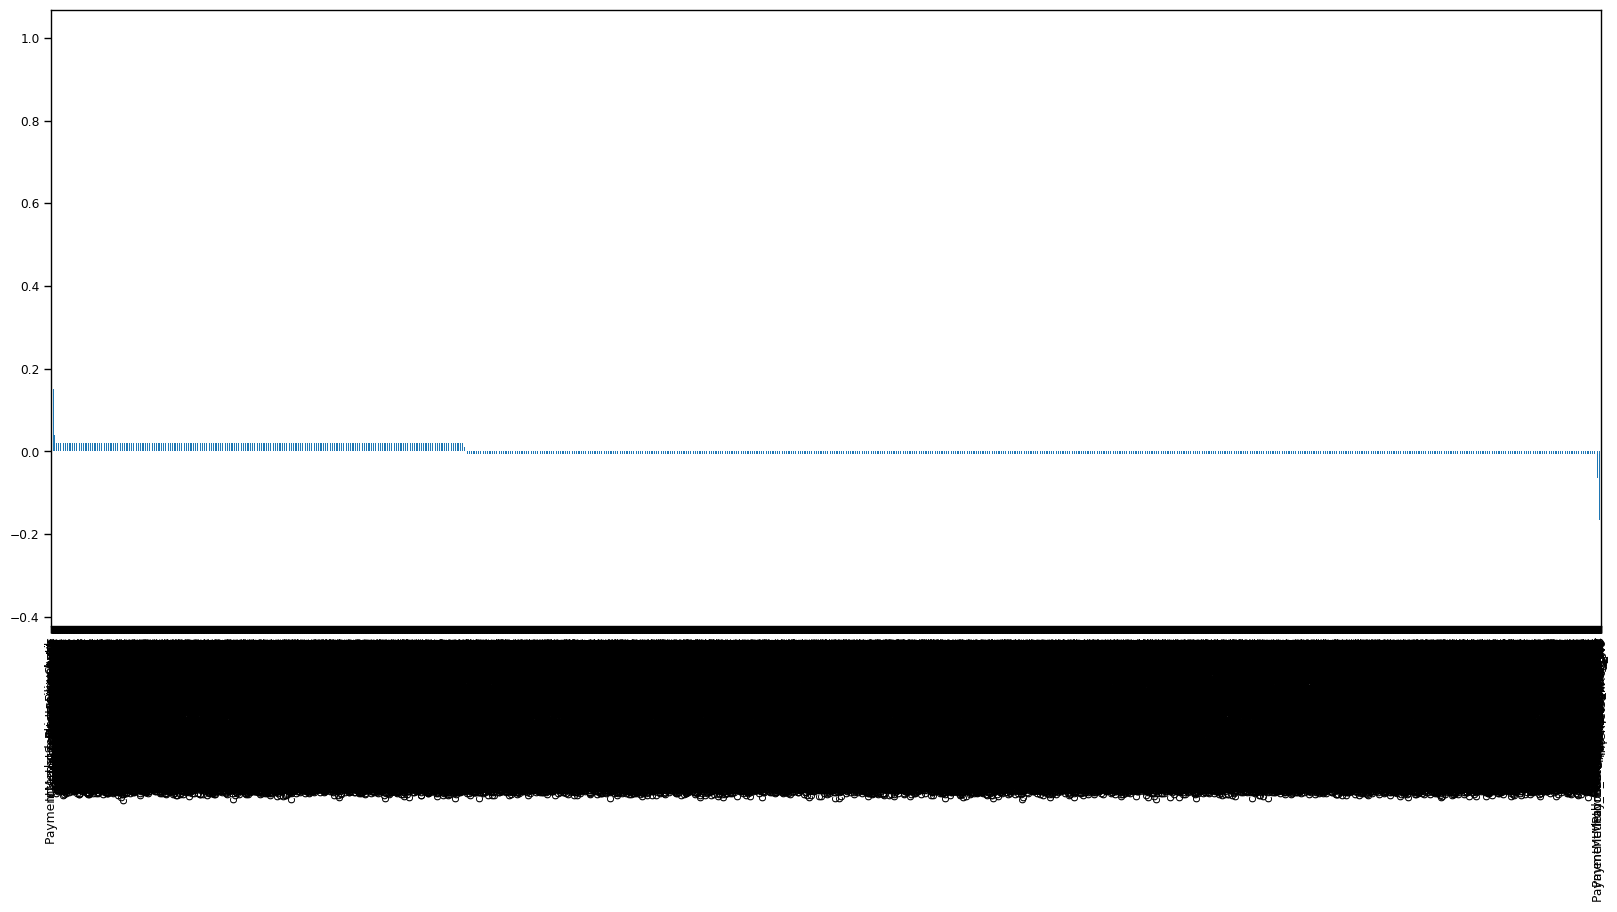

In [47]:
plt.figure(figsize=(20,8))
df1_encod.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [48]:
df1_encod

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


* HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

In [49]:
df1_encod.to_csv('Data_Set_EDA_1.csv')